In [1]:
from travelling_salesman import Route, calculate_distance, node_swapper, map24_random, map150_greedy, map150_random
from matplotlib import pyplot as plt
from statistics import mean

# function that chooses the steepest ascent amongst all right-neighbour swaps
def hill_climbing_steepest_neighbour(map, path):
    smallest = calculate_distance(map, path)
    temp_path = path
    for i in range(len(path)):
        p = list(path)
        temp = p[i]
        p[i] = p[(i+1)%len(p)]
        p[(i+1)%len(p)] = temp
        d = calculate_distance(map, p)
        if d < smallest:
            smallest = d
            temp_path = p
    return temp_path

# function that chooses the steepest ascent amongst all possible swaps
def hill_climbing_steepest_all(map, path):
    smallest = calculate_distance(map, path)
    temp_path = path
    for i in range(len(path)-1):
        for j in range(i+1, len(path)):
            p = list(path)
            temp = p[i]
            p[i] = p[j]
            p[j] = temp
            d = calculate_distance(map, p)
            if d < smallest:
                smallest = d
                temp_path = p
    return temp_path

def run_steepest(route, neighbour=True):
    print("Running Steepest Ascent Hill Climbing")
    if neighbour == True:
        print("Choosing the best improvement from all right-neighbour swaps")
    else:
        print("Choosing the best improvement from all possible swaps")
    print("Initial route:")
    route.plot()
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1:
        dists.append(route.distance)
        if neighbour == True:
            new_route = Route(route.map, hill_climbing_steepest_neighbour(route.map, route.path))
        else:
            new_route = Route(route.map, hill_climbing_steepest_all(route.map, route.path))
        if new_route.distance < route.distance:
            route = new_route
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    route.plot()
    plt.plot(dists)
    plt.show()

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all right-neighbour swaps
Initial route:


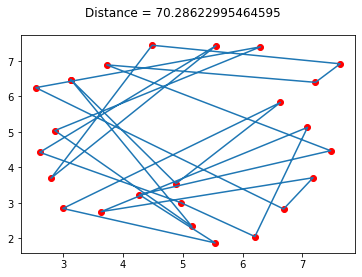

Final route:


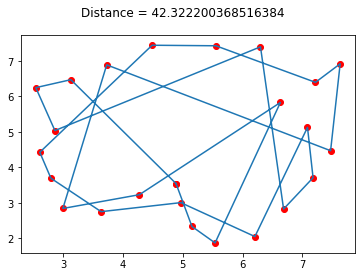

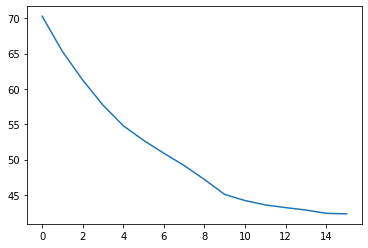

Wall time: 274 ms


In [2]:
%%time
run_steepest(map24_random, neighbour=True)

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all possible swaps
Initial route:


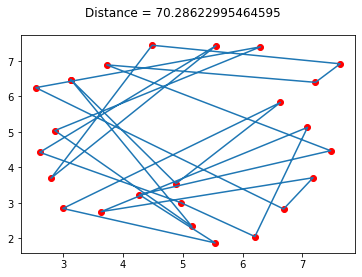

Final route:


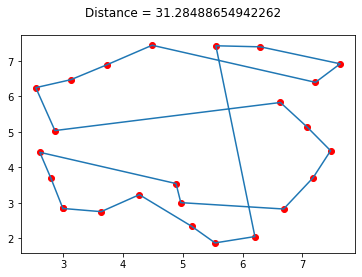

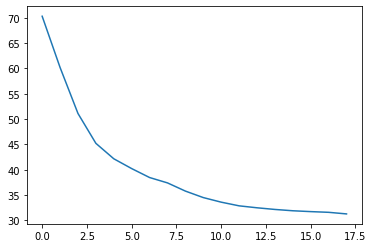

Wall time: 251 ms


In [3]:
%%time
run_steepest(map24_random, neighbour=False)

In [4]:
def run_random(route, verbose=True):
    if verbose == True:
        print("Running Simple Random Hill Climbing")
        print("Swapping two random nodes, and accepting the solution if it is an improvement.")
        print("Initial route:")
        route.plot()
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1000:
        dists.append(route.distance)
        new_route = Route(route.map, node_swapper(route.path))
        if new_route.distance < route.distance:
            route = new_route
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    if verbose == True:
        print("Final route:")
        route.plot()
        plt.plot(dists)
        plt.show()
    else:
        return route.distance

Running Simple Random Hill Climbing
Swapping two random nodes, and accepting the solution if it is an improvement.
Initial route:


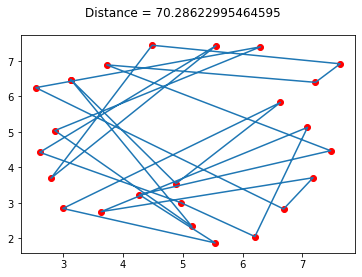

Final route:


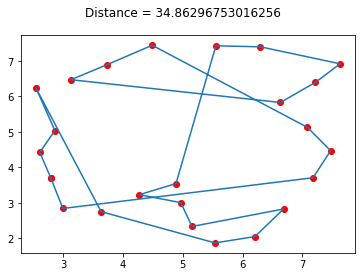

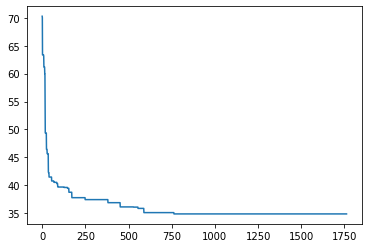

Wall time: 242 ms


In [5]:
%%time
run_random(map24_random)

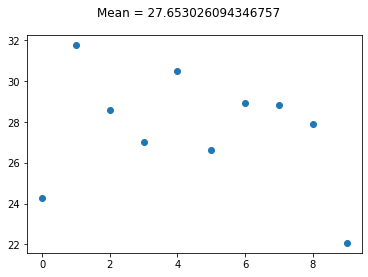

Wall time: 192 ms


In [6]:
%%time
results = []
for i in range(10):
    results.append(run_random(map24_random, verbose=False))

plt.scatter(range(10), results)
plt.suptitle(f"Mean = {mean(results)}")
plt.show()

### A random map of 150 nodes

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all right-neighbour swaps
Initial route:


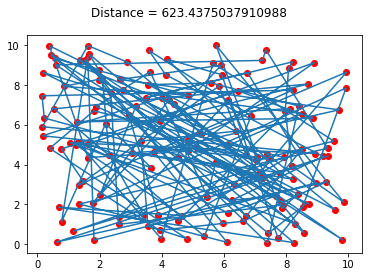

Final route:


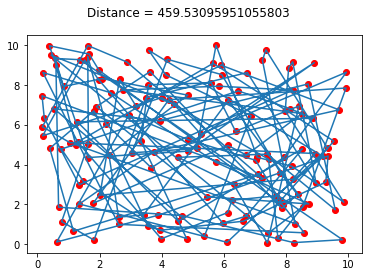

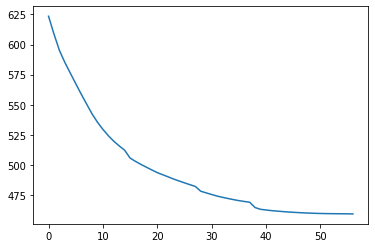

Wall time: 384 ms


In [7]:
%%time
run_steepest(map150_random, neighbour=True)

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all right-neighbour swaps
Initial route:


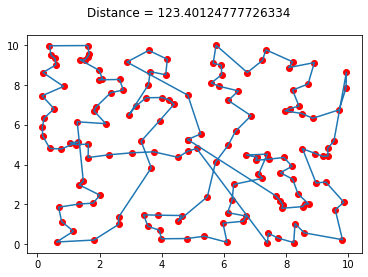

Final route:


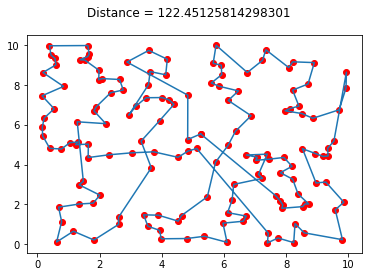

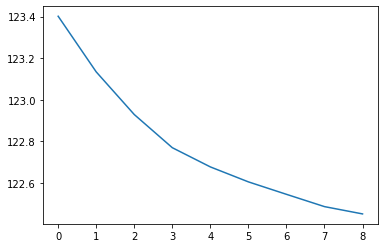

Wall time: 328 ms


In [8]:
%%time
run_steepest(map150_greedy, neighbour=True)

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all possible swaps
Initial route:


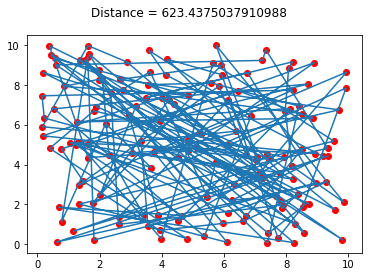

Final route:


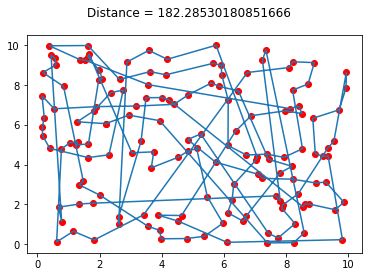

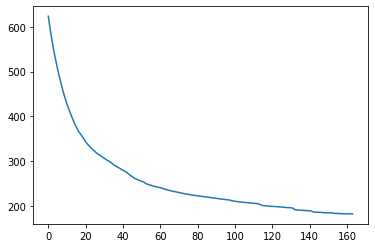

Wall time: 28.9 s


In [9]:
%%time
run_steepest(map150_random, neighbour=False)

Running Steepest Ascent Hill Climbing
Choosing the best improvement from all possible swaps
Initial route:


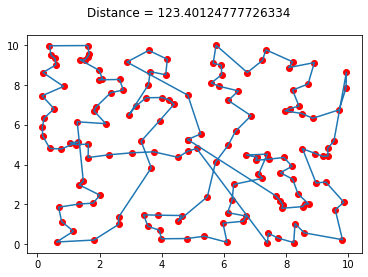

Final route:


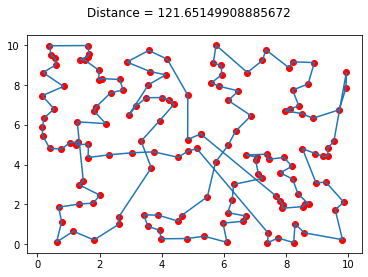

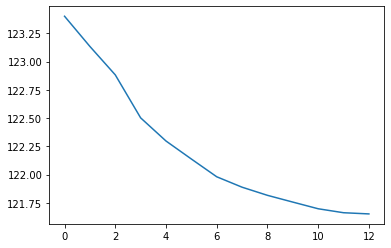

Wall time: 2.49 s


In [10]:
%%time
run_steepest(map150_greedy, neighbour=False)

Running Simple Random Hill Climbing
Swapping two random nodes, and accepting the solution if it is an improvement.
Initial route:


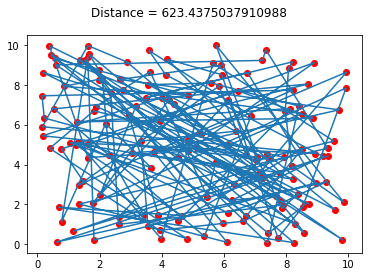

Final route:


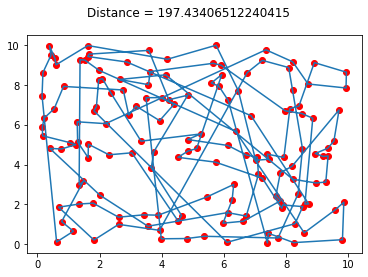

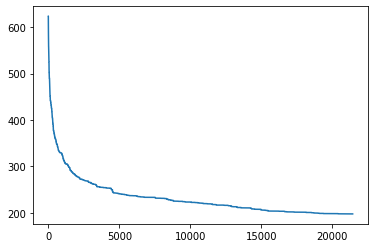

Wall time: 645 ms


In [11]:
%%time
run_random(map150_random)

Running Simple Random Hill Climbing
Swapping two random nodes, and accepting the solution if it is an improvement.
Initial route:


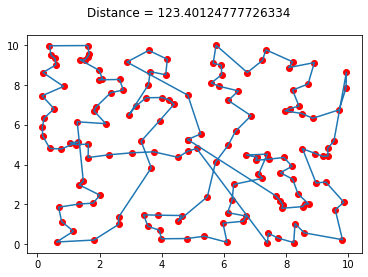

Final route:


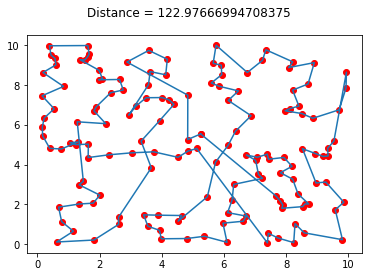

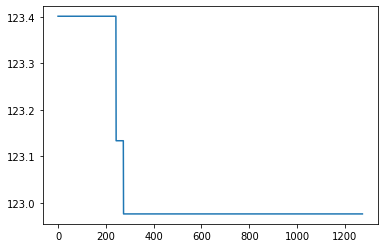

Wall time: 318 ms


In [12]:
%%time
run_random(map150_greedy)

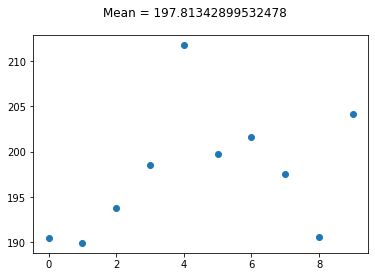

Wall time: 4.24 s


In [13]:
%%time
results = []
for i in range(10):
    results.append(run_random(map150_random, verbose=False))

plt.scatter(range(10), results)
plt.suptitle(f"Mean = {mean(results)}")
plt.show()